## Import Libraries

In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training image preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None, 
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 93839 files belonging to 62 classes.


### Validation image preprocessing

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None, 
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 23174 files belonging to 62 classes.


In [10]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 62), dtype=tf.float32, name=None))>

In [12]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[194.25 195.25 199.75]
   [194.5  196.   197.  ]
   [197.5  200.   194.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[196.25 197.75 198.25]
   [192.5  194.75 191.25]
   [196.5  202.5  190.75]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[193.5  196.25 188.25]
   [200.25 206.25 194.5 ]
   [153.75 160.75 143.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

### To avoid overshooting
1. choose small learning rate default 0.001 we are taking 0.0001
2. they may be chance of underfitting so increase number of neuron
3. add mors convolution layer to extract more feature from images they may be possiblity that model unable to capture relavent 

 ## Building model

In [16]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [18]:
model = Sequential()

## Building Convolutional Layer

In [21]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [25]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [27]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [29]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [31]:
model.add(Dropout(0.25)) #to avoid overfitting

In [33]:
model.add(Flatten())

In [35]:
model.add(Dense(units=1500,activation='relu'))

In [37]:
model.add(Dropout(0.4))

In [39]:
#out put layer
model.add(Dense(units=62,activation='softmax'))

## Compiling Model

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │        93,062 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,878,786 (30.06 MB)

 Trainable params: 7,878,786 (30.06 MB)

 Non-trainable params: 0 (0.00 B)

 ### Model Training

In [47]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 5067s 2s/step - accuracy: 0.4298 - loss: 2.1443 - val_accuracy: 0.6874 - val_loss: 2.2862
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3183s 1s/step - accuracy: 0.8339 - loss: 0.5309 - val_accuracy: 0.7817 - val_loss: 2.5125
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3135s 1s/step - accuracy: 0.8983 - loss: 0.3177 - val_accuracy: 0.8173 - val_loss: 2.8189
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3154s 1s/step - accuracy: 0.9304 - loss: 0.2102 - val_accuracy: 0.8215 - val_loss: 2.8679
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3236s 1s/step - accuracy: 0.9473 - loss: 0.1613 - val_accuracy: 0.8172 - val_loss: 3.8891
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3489s 1s/step - accuracy: 0.9585 - loss: 0.1253 - val_accuracy: 0.8366 - val_loss: 3.3682
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 16537s 6s/step - accuracy: 0.9643 - loss: 0.1048 - val_accuracy: 0.8490 - val_loss: 4.1085
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3122s 1s/step - accuracy: 0.9728 

## Model evaluation

In [49]:
#model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

2933/2933 ━━━━━━━━━━━━━━━━━━━━ 790s 269ms/step - accuracy: 0.9896 - loss: 0.0323


In [51]:
print(train_loss,train_acc)

0.029493845999240875 0.9906435608863831


In [53]:
#model on validation set
val_loss,val_acc = model.evaluate(validation_set)

725/725 ━━━━━━━━━━━━━━━━━━━━ 186s 256ms/step - accuracy: 0.8474 - loss: 3.4005


In [55]:
print(val_loss,val_acc)

3.4676566123962402 0.8469836711883545


## saving model

In [57]:
model.save("trained_plant_disease_model.keras")

In [59]:
training_history.history

{'accuracy': [0.617760181427002,
  0.8558914661407471,
  0.9093447327613831,
  0.9352082014083862,
  0.9517258405685425,
  0.9618708491325378,
  0.9674335718154907,
  0.973507821559906,
  0.9775359630584717,
  0.9803066849708557],
 'loss': [1.3426783084869385,
  0.45306161046028137,
  0.2819051742553711,
  0.19403010606765747,
  0.14779379963874817,
  0.11576447635889053,
  0.09725519269704819,
  0.0806596577167511,
  0.06977952271699905,
  0.0635441318154335],
 'val_accuracy': [0.6874083280563354,
  0.7816518545150757,
  0.8173384070396423,
  0.8215241432189941,
  0.8171657919883728,
  0.8366272449493408,
  0.8489686846733093,
  0.8347717523574829,
  0.8395184278488159,
  0.8469836711883545],
 'val_loss': [2.2862162590026855,
  2.512451171875,
  2.818931818008423,
  2.8678770065307617,
  3.889125108718872,
  3.3681795597076416,
  4.108458518981934,
  3.9824938774108887,
  3.5322823524475098,
  3.4676566123962402]}

In [61]:
#recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [63]:
training_history.history['accuracy']


[0.617760181427002,
 0.8558914661407471,
 0.9093447327613831,
 0.9352082014083862,
 0.9517258405685425,
 0.9618708491325378,
 0.9674335718154907,
 0.973507821559906,
 0.9775359630584717,
 0.9803066849708557]

## Accuracy visualization

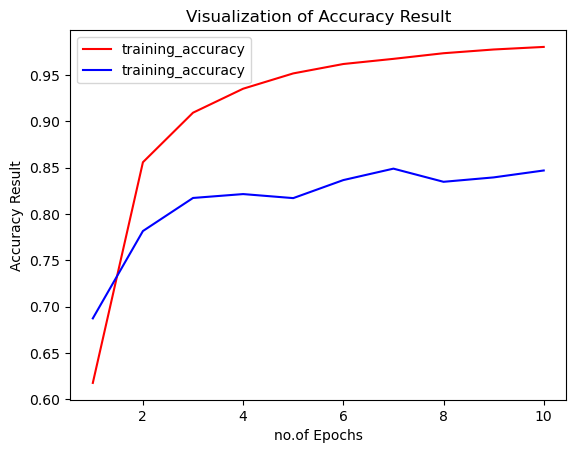

In [66]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='training_accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='training_accuracy')
plt.xlabel("no.of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## some other metrics for model evaluation


In [70]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Banana Bract Mosaic Virus Disease',
 'Banana Insect Pest Disease',
 'Banana Moko Disease',
 'Banana Panama Disease',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Healthy_Leaf_of_Jackfruit',
 'Jackfruit_Algal_Leaf_Spot_of_',
 'Jackfruit_Black_Spot_of_',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry

In [72]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None, 
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 23174 files belonging to 62 classes.


In [73]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

725/725 ━━━━━━━━━━━━━━━━━━━━ 178s 245ms/step


(array([[9.9994063e-01, 2.5412603e-05, 7.8385387e-09, ..., 4.2982051e-13,
         1.6270058e-12, 8.8866506e-13],
        [9.9998510e-01, 4.4533822e-06, 6.6130612e-10, ..., 2.2438802e-12,
         1.2301576e-11, 1.1628980e-12],
        [1.0000000e+00, 5.5384145e-11, 1.3544533e-12, ..., 2.1213370e-19,
         6.3688804e-18, 2.3984667e-20],
        ...,
        [1.2098446e-08, 2.9885015e-07, 1.4400703e-08, ..., 3.6194828e-01,
         5.8166695e-01, 2.0270064e-03],
        [2.8079153e-06, 3.1008963e-06, 4.9735786e-06, ..., 1.5153551e-02,
         1.5529077e-02, 7.5895144e-03],
        [7.1746504e-06, 1.5578615e-06, 9.6783344e-07, ..., 2.2828504e-03,
         1.6111853e-02, 6.7335807e-02]], dtype=float32),
 (23174, 62))

In [76]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [78]:
predicted_categories 

<tf.Tensor: shape=(23174,), dtype=int64, numpy=array([ 0,  0,  0, ..., 60,  4, 11], dtype=int64)>

In [80]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(23174, 62), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [81]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(23174,), dtype=int64, numpy=array([ 0,  0,  0, ..., 61, 61, 61], dtype=int64)>

In [82]:
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.96      0.97       504
                                 Apple___Black_rot       0.94      1.00      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.97       440
                                   Apple___healthy       0.96      0.98      0.97       502
                 Banana Bract Mosaic Virus Disease       0.96      0.86      0.91        50
                        Banana Insect Pest Disease       0.82      0.98      0.89        86
                               Banana Moko Disease       0.86      0.78      0.82        55
                             Banana Panama Disease       0.69      1.00      0.82        41
                               Blueberry___healthy       0.98      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.

In [84]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[484,   5,   0, ...,   0,   0,   0],
       [  1, 495,   1, ...,   0,   0,   0],
       [  0,   0, 427, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  82,  12,   4],
       [  0,   0,   0, ...,   0,  81,   1],
       [  0,   0,   0, ...,   4,   1,  73]], dtype=int64)

## confucion matrix visualization

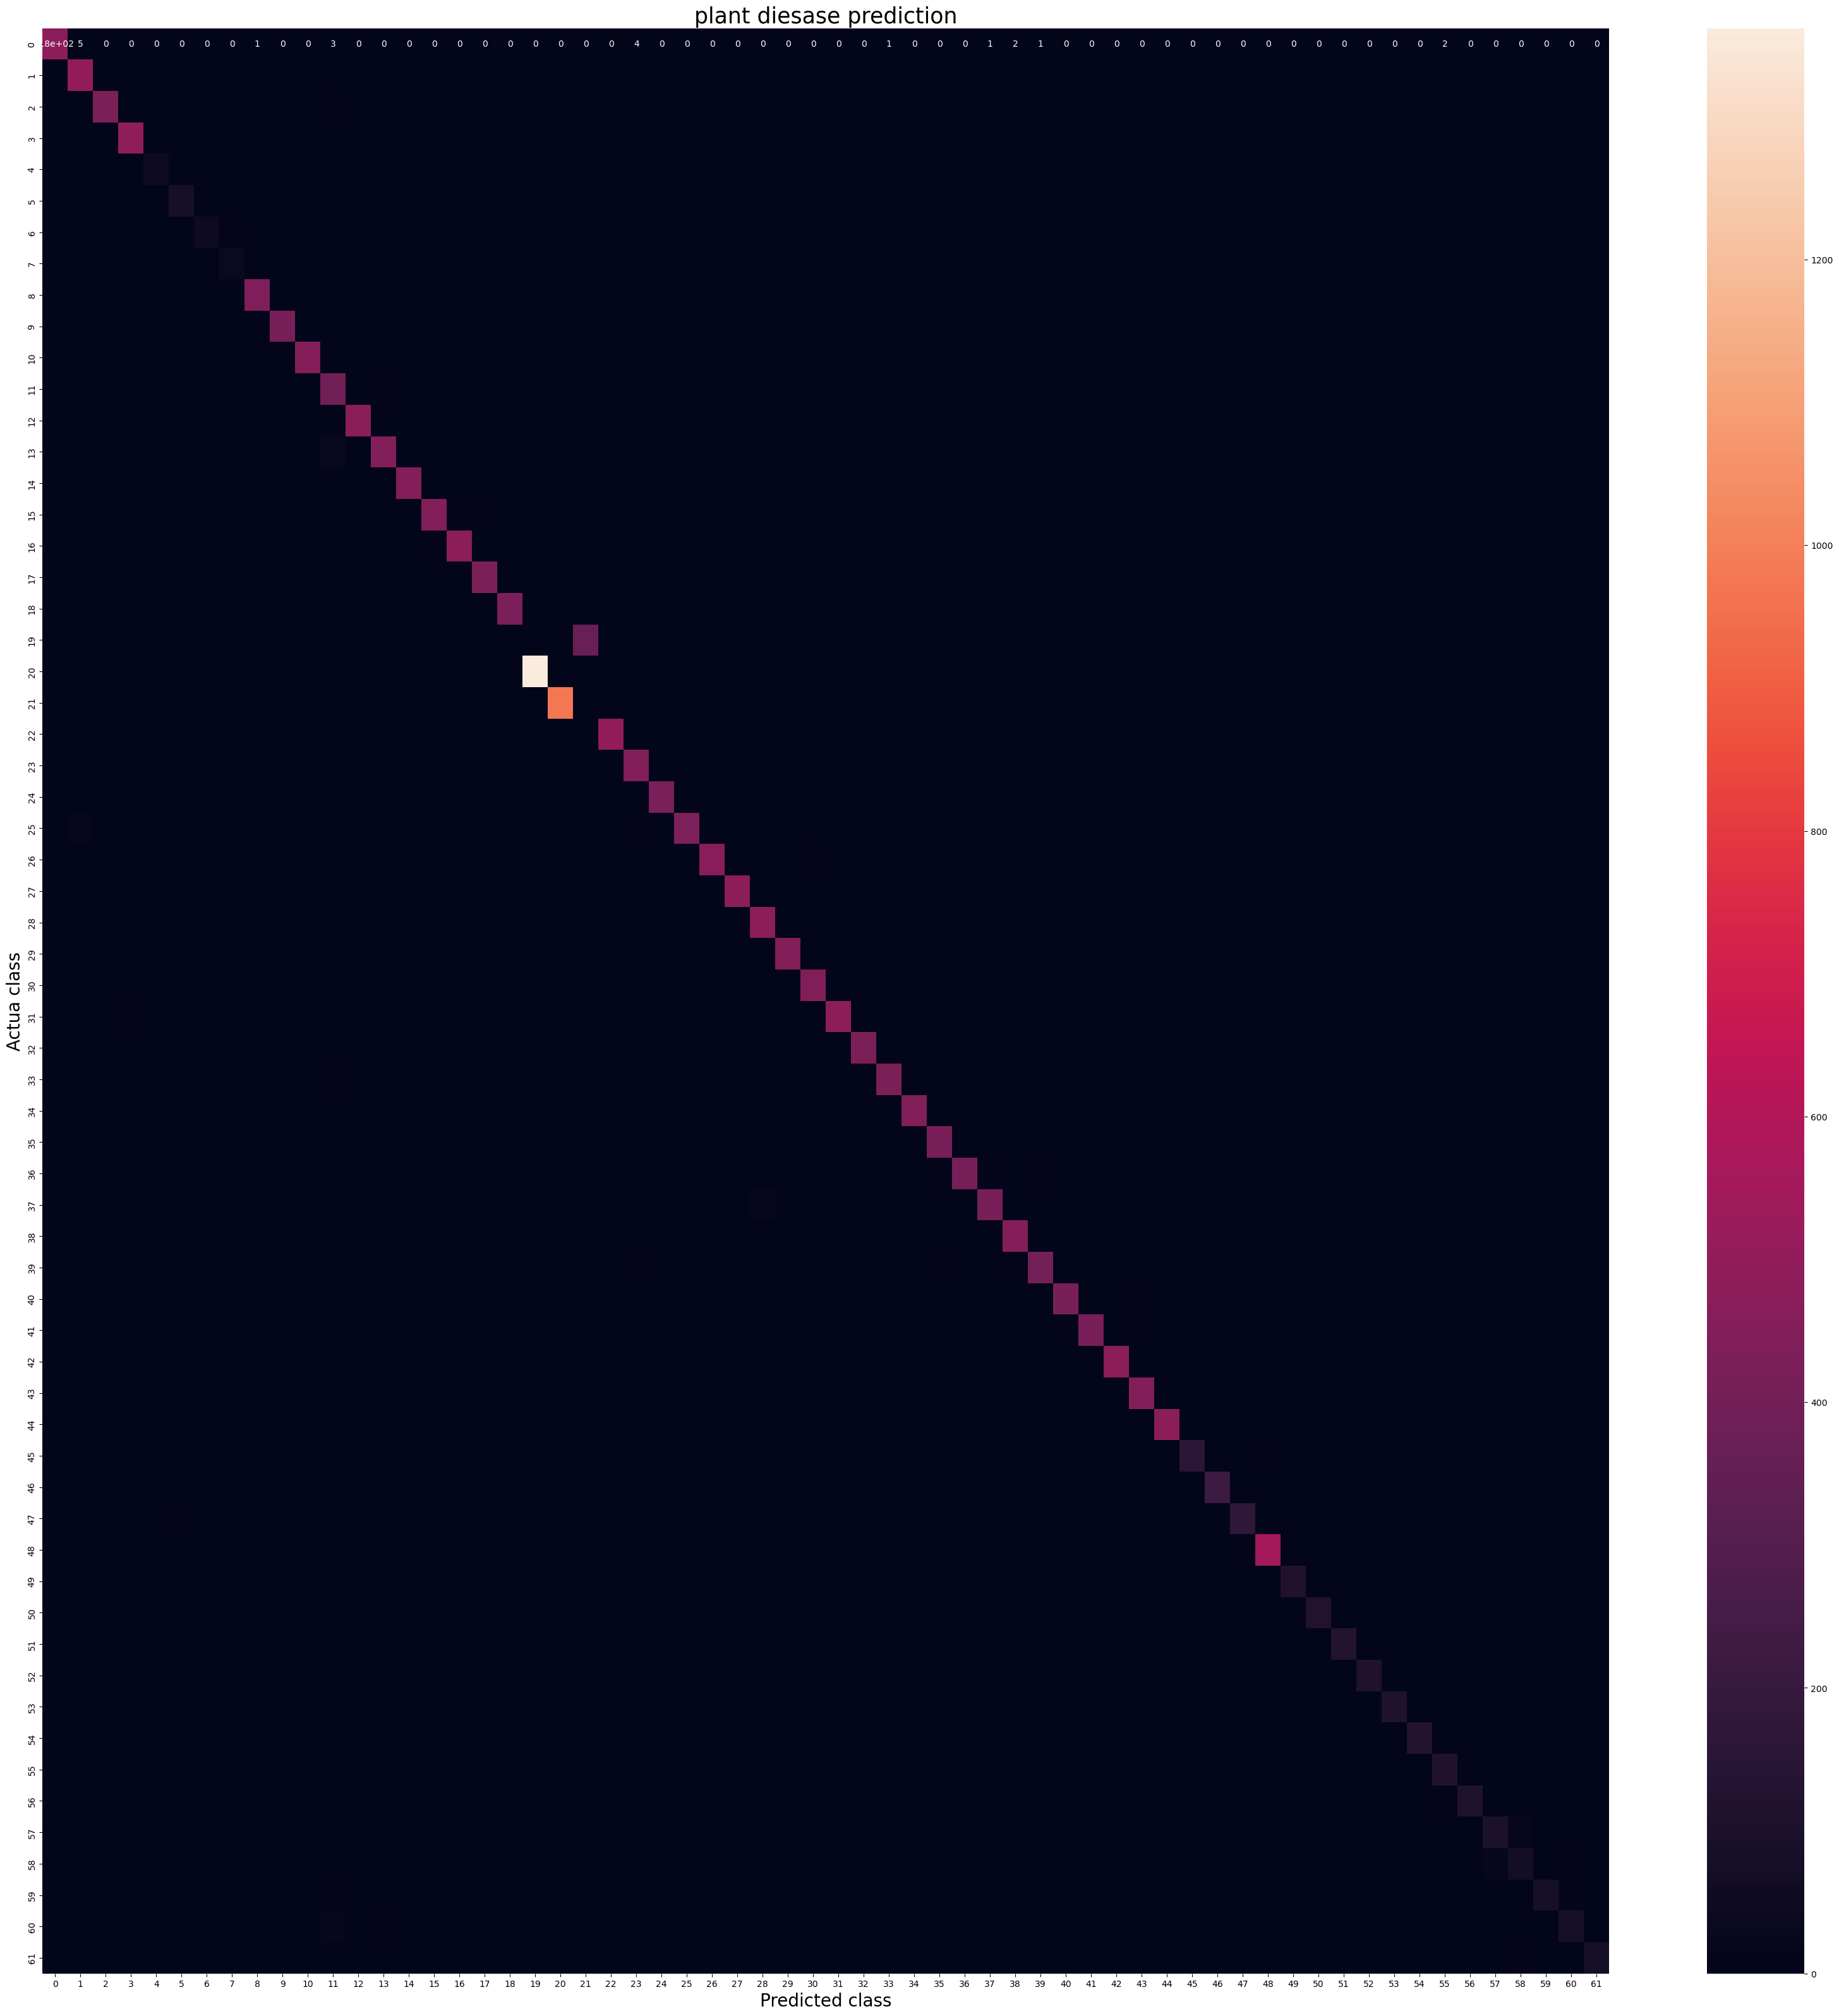

In [86]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actua class",fontsize=20)
plt.title("plant diesase prediction",fontsize=25)
plt.show()